In [ ]:
import sys
!{sys.executable} -m pip install lime
!{sys.executable} -m pip install xgboost

In [123]:
# DATA
import pandas as pd
import numpy as np
# DATA VISUALIZATION / PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# STATISTICAL TESTS
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
# MACHINE LEARNING
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import plot_importance
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, fbeta_score, roc_auc_score, auc, roc_curve, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut
from lime import lime_tabular

### Importing data

In [2]:
# Reading data 
df_raw = pd.read_csv('/Users/marina/airbnb/data/listings 2.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To display the top 5 rows 
df_raw.head(5) 

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitche

In [3]:
df_raw.tail(5)  

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
26610,48269503,https://www.airbnb.com/rooms/48269503,20210222161029,2021-02-24,Quarto inteiro no Recreio dos Bandeirantes.,NaN,NaN,https://a0.muscache.com/pictures/8d90763a-8aac...,389246322,https://www.airbnb.com/users/show/389246322,Vivian,2021-02-19,BR,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/ca98f...,https://a0.muscache.com/im/pictures/user/ca98f...,NaN,4.0,4.0,"['email', 'phone']",t,f,NaN,Recreio dos Bandeirantes,NaN,-23.01452,-43.46005,Private room in apartment,Private room,1,NaN,Private half-bath,1.0,1.0,"[""Kitchen"", ""Washer"", ""Hot water"", ""Air condit...",$94.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,180,2021-02-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
26611,48269534,https://www.airbnb.com/rooms/48269534,20210222161029,2021-02-24,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",Nossa casa totalmente mobiliada está localizad...,Conheça um pouquinho da zona oeste do Rio de J...,https://a0.muscache.com/pictures/54e06fdd-b88b...,122122028,https://www.airbnb.com/users/show/122122028,Victor,2017-03-22,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7f4da...,https://a0.muscache.com/im/pictures/user/7f4da...,NaN,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Cidade de Deus, Rio de Janeiro, Brazil",Cidade de Deus,NaN,-22.95078,-43.35997,Entire house,Entire home/apt,6,NaN,1 bath,2.0,3.0,"[""Dedicated workspace"", ""Kitchen"", ""Air condit...",$141.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,30,60,90,365,2021-02-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26612,48270411,https://www.airbnb.com/rooms/48270411,20210222161029,2021-02-24,BR-RJ020 Casa Niemeyer vista deslumbrante,Uma vista deslumbrante de toda praia de são Co...,O bairro é muito bem localizado próximo à prai...,https://a0.muscache.com/pictures/8cc66765-57fd...,13773093,https://www.airbnb.com/users/show/13773093,Raphael,2014-04-01,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Amo o contato com as pessoas e busco sempre fo...,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/688dc...,https://a0.muscache.com/im/pictures/user/688dc...,NaN,0.0,0.0,"['email', 'phone', 'manual_offline', 'jumio', ...",t,t,"São Conrado, Rio de Janeiro, Brazil",São Conrado,NaN,-22.99825,-43.25133,Entire villa,Entire home/apt,8,NaN,3 baths,4.0,4.0,"[""Wine glasses"", ""Extra pillows and blankets"",...","$2,500.00",3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,25,55,85,360,2021-02-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26613,48270514,https://www.airbnb.com/rooms/48270514,20210222161029,2021-02-24,

In [4]:
df_raw.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

In [5]:
# REMOVING IRRELEVANT COLUMNS
to_drop = ["listing_url",
           "scrape_id",
           "name",
           "description", 
           "neighborhood_overview",
           "picture_url",
           "host_id", 
           "host_url", 
           "host_name", 
           "host_location", 
           "host_about",
           "host_thumbnail_url",
           "host_picture_url", 
           "host_neighbourhood",
           "host_verifications"]

df = df_raw.drop(to_drop, axis = 1)
df.shape

(26615, 59)

#### Checking Duplicate Rows

In [6]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 59)


### Cleaning Data

In [7]:
print(df.isnull().sum())

id                                                  0
last_scraped                                        0
host_since                                         24
host_response_time                               8016
host_response_rate                               8016
host_acceptance_rate                             9541
host_is_superhost                                  24
host_listings_count                                24
host_total_listings_count                          24
host_has_profile_pic                               24
host_identity_verified                             24
neighbourhood                                   12301
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    26615
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

Removing neighbourhood because there's too many missing values while neighbourhood_cleansed doesn't have any. Other missing columns also removed.

In [8]:
#DROPPING MISSING COLUMNS
df = df.drop(['neighbourhood','neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'], axis=1)
df.shape

(26615, 54)

host_listings_count and host_total_listings_count are the same and have same NaN cases. So one of these columns can be dropped.

In [9]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

24


,id,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
610,895893,2021-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Copacabana,-22.97526,-43.19348,Entire apartment,Entire home/apt,7,2 baths,3.0,3.0,"[""Air conditioning"", ""Essentials"", ""Hangers"", ...",$230.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,0,0,0,1,2021-02-25,51,0,0,2014-07-12,2019-02-03,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0,0.63
654,916057,2021-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maracanã,-22.91066,-43.21965,Entire house,Entire home/apt,6,NaN,3.0,1.0,"[""Long term stays allowed"", ""Wifi"", ""TV""]","$1,200.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,2021-02-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
2208,2692189,2021-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maracanã,-22.91268,-43.21945,Entire house,Entire home/apt,8,1 bath,3.0,10.0,"[""Long term stays allowed"", ""Kitchen"", ""Wifi"",...","$4,091.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,30,60,90,365,2021-02-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
2228,2703264,2021-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ipanema,-22.98681,-43.19631,Entire apartment,Entire home/apt,4,2 baths,2.0,4.0,"[""Elevator"", ""Kitchen"", ""Hair dryer"", ""Air con...","$1,077.00",4,30,4.0,4.0,30.0,30.0,4.0,30.0,t,28,58,88,363,2021-02-23,12,0,0,2014-06-20,2020-01-06,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0,0.15
3542,4603046,2021-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Copacabana,-22.97958,-43.19041,Entire apartment,Entire home/apt,4,1 bath,2.0,4.0,"[""Elevator"", ""Kitchen"", ""Washer"", ""Air conditi...",$861.00,8,30,8.0,8.0,30.0,30.0,8.0,30.0,t,27,57,87,362,2021-02-23,2,0,0,2015-01-04,2016-06-14,80.0,10.0,8.0,6.0,10.0,10.0,8.0,f,1,1,0,0,0.03


last_scraped and calendar_last_scraped are the equal. So one of these columns can be dropped.

In [10]:
#DUPPLICATED COLUMN 
print(sum((df.last_scraped == df.calendar_last_scraped) == False))

0


In [11]:
df = df.drop(['calendar_last_scraped', 'host_total_listings_count'], axis=1)
df.shape

(26615, 52)

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.661500e+04,26591.000000,26591.000000,26591.000000,26591.000000,26615.000000,26615.000000,26615.000000,24869.000000,26363.000000,26615.000000,2.661500e+04,26531.000000,26531.000000,2.653100e+04,2.653100e+04,26531.000000,2.653100e+04,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16118.000000,16104.000000,16107.000000,16106.000000,16110.000000,16106.000000,16108.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000
mean,2.526448e+07,0.171223,9.367568,0.996653,0.630514,-22.965837,-43.248533,4.161112,1.707909,2.548230,4.725268,3.819109e+04,4.660510,5.032038,3.842962e+04,3.843929e+04,4.788828,3.843440e+04,0.970505,19.245200,41.221379,64.233440,219.438174,12.146308,2.341725,0.296487,94.571349,9.636612,9.392376,9.799888,9.758535,9.759717,9.296374,0.343754,9.665414,8.259177,1.295022,0.087620,0.629190
std,1.573416e+07,0.376711,93.121768,0.057757,0.482675,0.034971,0.096296,2.494174,1.054267,2.127716,19.102522,6.129662e+06,18.908336,19.572665,6.139357e+06,6.139357e+06,19.222567,6.139357e+06,0.169192,12.455029,23.794758,34.644936,141.525405,29.722813,5.707102,0.882080,9.740887,0.940490,1.138224,0.767390,0.829072,0.749132,1.053340,0.474969,35.942124,31.611146,5.300625,0.622397,0.876064
min,1.787800e+04,0.000000,0.000000,0.000000,0.000000,-23.072920,-43.704790,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.220219e+07,0.000000,1.000000,1.000000,0.000000,-22.984570,-43.304090,2.000000,1.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,9.000000e+01,9.000000e+01,1.600000,9.000000e+01,1.000000,3.000000,23.000000,43.000000,88.000000,0.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.090000
50%,2.374090e+07,0.000000,1.000000,1.000000,1.000000,-22.971700,-43.196210,4.000000,1.000000,2.000000,2.000000,1.000000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.200000,1.125000e+03,1.000000,27.000000,56.000000,86.000000,254.000000,2.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.270000
75%,4.089613e+07,0.000000,4.000000,1.000000,1.000000,-22.951575,-43.186300,5.000000,2.000000,3.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,1.000000,30.000000,59.000000,89.000000,363.000000,9.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.850000
max,4.827600e+07,1.000000,7218.000000,1.000000,1.000000,-22.749820,-43.104860,16.000000,30.000000,50.000000,1000.000000,1.000000e+09,1000.000000,1000.000000,1.000000e+09,1.000000e+09,1000.000000,1.000000e+09,1.000000,30.000000,60.000000,90.000000,365.000000,446.000000,118.000000,36.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0

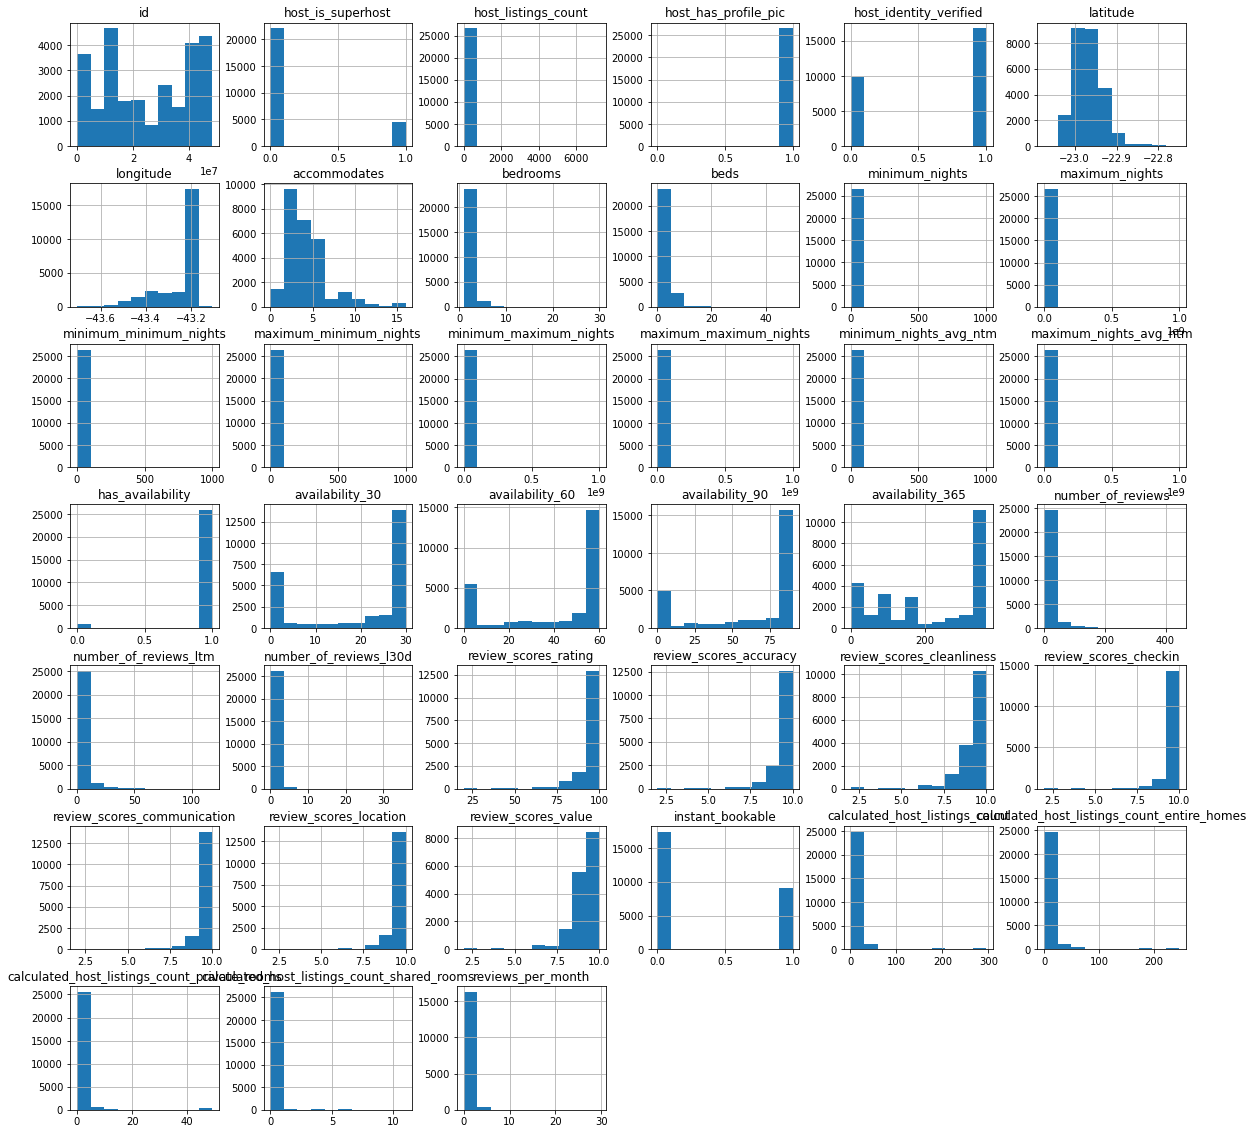

In [12]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)
df.hist(figsize=(20,20));

# Descriptive table
df.describe()

### Cleaning individual columns

#### Bathrooms
In earlier versions of the site, Airbnb provided a number, now they provide bathrooms_text (a textual description for the number of bathrooms) . 
I need to parse the field bathrooms_text to get the number of bathrooms and I also created a new field shared_bathroom (if the bathroom is shared)

In [13]:
# Removing Null values in bathroom_text 
abnb = df.dropna(subset=['bathrooms_text'])
abnb['bathrooms_text'].isnull().sum()

0

In [14]:
word = abnb['bathrooms_text'].map(lambda x: x.split(' ')[0])
bathrooms = pd.to_numeric(word, errors='coerce')
bathrooms = bathrooms.fillna(0.5)

In [15]:
abnb.loc[:,'bathrooms'] = bathrooms
abnb.loc[:,'text'] = abnb['bathrooms_text'].str.lower()
abnb.loc[abnb['text'].str.contains('shared'), 'shared_bathroom'] = 1
abnb.loc[:,'shared_bathroom'] = abnb['shared_bathroom'].fillna(0).astype('int64')
abnb = abnb.drop(['text', 'bathrooms_text'], axis=1)

/Users/marina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/marina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/marina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

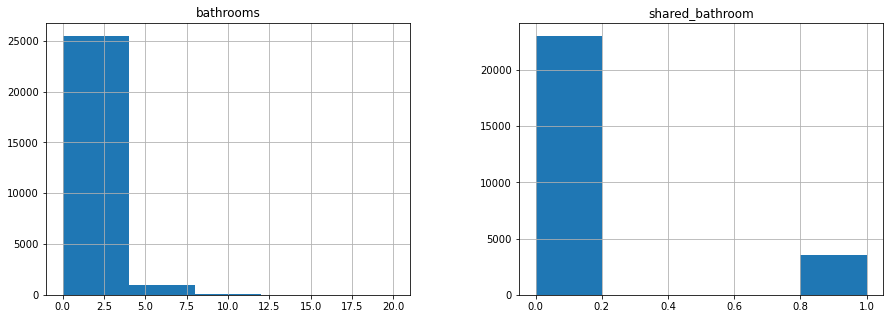

In [16]:
#pd.crosstab(abnb.bathrooms, abnb.shared_bathroom)
abnb.hist(column= ['bathrooms', 'shared_bathroom'], figsize=(15,5), bins=5);

##### Price

In [17]:
# Removing '$' from price feature
abnb.price = abnb.price.str[1:-3]
abnb.price = abnb.price.str.replace(',', '')

In [25]:
abnb.price = abnb.price.astype('int64')

#### Amenities

In [ ]:
# abnb.amenities[:1].values

In [26]:
# List of all amenities
amenities_lst = list(abnb.amenities.str.lower())
amenities_lst_str = " ".join(amenities_lst)
amenities_lst_str = amenities_lst_str.replace('[', '')
amenities_lst_str = amenities_lst_str.replace(']', ',')
amenities_lst_str = amenities_lst_str.replace('"', '')

amenities_set = [x.strip() for x in amenities_lst_str.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '02 bocas c/forno gas stove',
 '02 bocas electric stove',
 '04 bocas c/forno gas stove',
 '1 space',
 '100 spaces',
 '14\\ tv',
 '17\\ tv with standard cable',
 '2 bocas electric stove',
 '2 bocas portatil electric stove',
 '2 burner hot plate electric stove',
 '2 caixas de 45w cada',
 '2 caixas sony bluetooth sound system',
 '2 in 1. sound system with aux',
 '2 spaces',
 '2-5 years old',
 '20 spaces',
 '20\\ hdtv with premium cable',
 '20\\ tv',
 '22\\ hdtv with netflix',
 '24\\ hdtv with netflix',
 '25\\ tv with chromecast',
 '27\\ hdtv with standard cable',
 '27\\ tv',
 '28\\ hdtv with netflix',
 '28\\ hdtv with standard cable',
 '29\\ tv with standard cable',
 '30\\ hdtv with amazon prime video',
 '30\\ tv with standard cable',
 '32\\ hdtv',
 '32\\ hdtv with amazon prime video',
 '32\\ hdtv with chromecast',
 '32\\ hdtv with netflix',
 '32\\ hdtv with premium cable',
 '32\\ hdtv with roku',
 '32\\ hdtv with standard cable',
 '32\\ tv',
 '32\\ tv with netflix',
 '32\\ tv with 

In [27]:
abnb.loc[abnb['amenities'].str.lower().str.contains('ar condicionado|air conditioning|heating'), 'air_conditioning'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('tv'), 'tv'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('netflix|prime video|apple tv|chromecast|alexa|game console'), 'streaming'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('premium cable|cable tv|hbo max'), 'cable_tv'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('stove|oven|microwave'), 'stove_oven'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('sound system'), 'sound_system'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('bathtub|hot tub'), 'bathtub'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('refrigerator|consul duo|freezer|fridge|refrigerador'), 'refrigerator'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('building staff'), 'building_staff'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('baby|0-2 years|crib|children'), 'child_friendly'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('closet'), 'closet'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('wardrobe'), 'wardrobe'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('bbq'), 'bbq'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('beachfront|waterfront'), 'beachfront'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('bikes'), 'bikes'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('breakfast'), 'breakfast'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('beach essentials'), 'beach_essentials'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('cleaning before checkout'), 'cleaning_before_checkout'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('coffee|nespresso'), 'coffee'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('workspace|desk|monitor'), 'workspace'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('bathroom essentials|soap|conditioner|sabonete|shampoo|dove|francis|johnson|lux|pantene|shower gel'), 'bath_essentials'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('kitchen|dishwasher|full kitchen'), 'kitchen'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('dryer|washer|iron'), 'laundry'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('elevator'), 'elevator'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('bed linens|bedroom comforts|extra pillows'), 'bed_comforts'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('ev charger'), 'ev_charger'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('fire|smoke alarm'), 'fire_equip'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('parking|garage'), 'parking'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('garden|backyard|patio'), 'garden'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('gym'), 'gym'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('wifi'), 'wifi'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('pool|sauna'), 'pool'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('self check-in'), 'self_check_in'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('Suitable for events'), 'event_suitable'] = 1
abnb.loc[abnb['amenities'].str.lower().str.contains('safe|guards|smart lock'), 'security'] = 1
abnb.shape # created 35 new columns
#abnb.head(100)

(26543, 88)

In [28]:
#Columns created starts at column 53
abnb.iloc[:5, 53:] 

,air_conditioning,tv,streaming,cable_tv,stove_oven,sound_system,bathtub,refrigerator,building_staff,child_friendly,closet,wardrobe,bbq,beachfront,bikes,breakfast,beach_essentials,cleaning_before_checkout,coffee,workspace,bath_essentials,kitchen,laundry,elevator,bed_comforts,ev_charger,fire_equip,parking,garden,gym,wifi,pool,self_check_in,event_suitable,security
0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [29]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = abnb.iloc[:,53:].columns
abnb[cols_to_replace_nulls] = abnb[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in abnb.iloc[:,53:].columns:
    if abnb[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
abnb.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
abnb.drop('amenities', axis=1, inplace=True)

['streaming', 'sound_system', 'bathtub', 'building_staff', 'child_friendly', 'closet', 'wardrobe', 'bbq', 'bikes', 'breakfast', 'beach_essentials', 'cleaning_before_checkout', 'ev_charger', 'self_check_in', 'event_suitable', 'security']


In [30]:
abnb.iloc[:5, 53:]

,tv,cable_tv,stove_oven,refrigerator,beachfront,coffee,workspace,bath_essentials,kitchen,laundry,elevator,bed_comforts,fire_equip,parking,garden,gym,wifi,pool
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


#### host_has_profile_pic

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

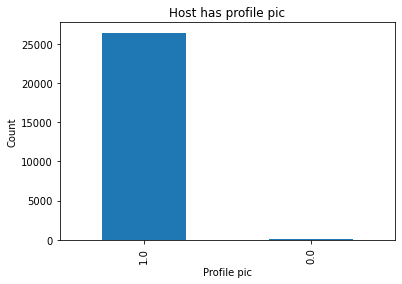

In [31]:
abnb['host_has_profile_pic'].value_counts().plot(kind='bar')
plt.title('Host has profile pic')
plt.xlabel('Profile pic')
plt.ylabel('Count')
sns.despine

Removing host_has_profile_pic because contain only one category.

In [32]:
abnb.drop('host_has_profile_pic', axis=1, inplace=True)
abnb.shape

(26543, 70)

#### Host_since
Calculating how long have been a host (difference between host_since and date of last_scraped)

In [33]:
# Converting to datetime
abnb.last_scraped = pd.to_datetime(abnb.last_scraped) 
abnb.host_since = pd.to_datetime(abnb.host_since) 

# Calculating how many days have been a host
abnb['host_age_days'] = (abnb.last_scraped - abnb.host_since).astype('timedelta64[D]')

# Replacing the 23 null values with the median 
abnb.host_age_days.fillna(abnb.host_age_days.median(), inplace=True)

Mean host_age_days: 1834.0
Median host_age_days: 1826.0


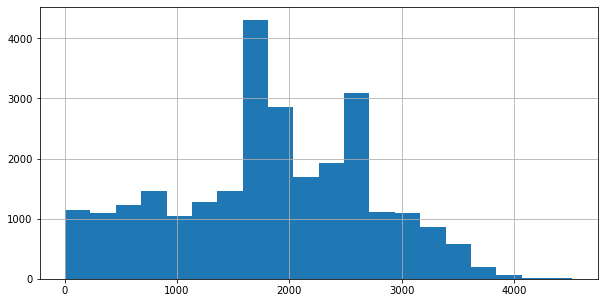

In [34]:
abnb.host_age_days.hist(figsize=(10,5), bins=20);
print("Mean host_age_days:", round(abnb['host_age_days'].mean(),0))
print("Median host_age_days:", abnb['host_age_days'].median())

#### Host_response_time

In [35]:
abnb['host_response_time'].value_counts(dropna=False, normalize=True)
abnb.host_response_time.fillna("missing", inplace=True)
abnb.host_response_time.value_counts(normalize=True)

within an hour        0.330709
missing               0.300644
within a few hours    0.160532
within a day          0.119165
a few days or more    0.088950
Name: host_response_time, dtype: float64

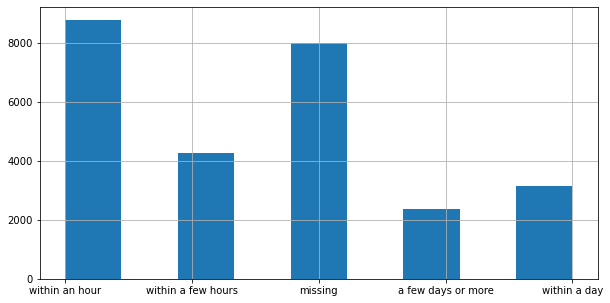

In [36]:
abnb.host_response_time.hist(figsize=(10,5), bins=9);

#### host_response_rate

count    18563.0
mean        84.0
std         31.0
min          0.0
25%         86.0
50%        100.0
75%        100.0
max        100.0
Name: host_response_rate, dtype: float64

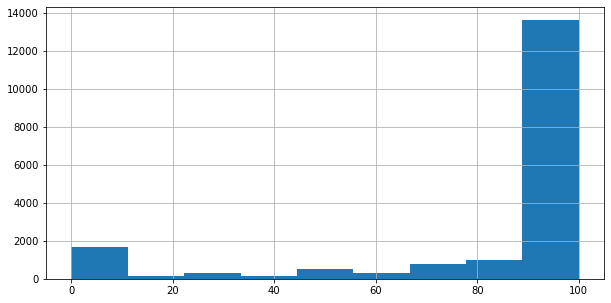

In [37]:
abnb.host_response_rate = abnb.host_response_rate.str[:-1].astype('float64')
abnb.host_response_rate.hist(figsize=(10,5), bins=9);
round(abnb['host_response_rate'].describe())

#### host_acceptance_rate

I suppose missing data in host_acceptance_rate are the hosts that had never been booked.

count    17043.0
mean        76.0
std         33.0
min          0.0
25%         61.0
50%         94.0
75%        100.0
max        100.0
Name: host_acceptance_rate, dtype: float64

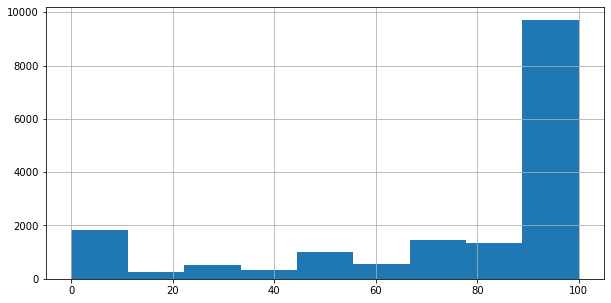

In [38]:
#Removing '%' from host_acceptance_rate
abnb.host_acceptance_rate = abnb.host_acceptance_rate.str[:-1].astype('float64')
abnb.host_acceptance_rate.hist(figsize=(10,5), bins=9);
round(abnb['host_acceptance_rate'].describe())

#### host_is_superhost

In [39]:
#Checking NaN cases
print(len(abnb[abnb.loc[ :,['host_is_superhost'] ].isna().sum(axis=1) == 1]))
abnb[abnb['host_is_superhost'].isna()]

23


,id,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,shared_bathroom,air_conditioning,tv,cable_tv,stove_oven,refrigerator,beachfront,coffee,workspace,bath_essentials,kitchen,laundry,elevator,bed_comforts,fire_equip,parking,garden,gym,wifi,pool,host_age_days
610,895893,2021-02-25,NaT,missing,NaN,NaN,NaN,NaN,NaN,Copacabana,-22.97526,-43.19348,Entire apartment,Entire home/apt,7,3.0,3.0,230,2,90,2.0,2.0,90.0,90.0,2.0,90.0,1,0,0,0,1,51,0,0,2014-07-12,2019-02-03,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0,1,1,0,0,0.63,2.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1826.0
2208,2692189,2021-02-24,NaT,missing,NaN,NaN,NaN,NaN,NaN,Maracanã,-22.91268,-43.21945,Entire house,Entire home/apt,8,3.0,10.0,4091,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,1,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,0,0,NaN,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1826.0
2228,2703264,2021-02-23,NaT,missing,NaN,NaN,NaN,NaN,NaN,Ipanema,-22.98681,-43.19631,Entire apartment,Entire home/apt,4,2.0,4.0,1077,4,30,4.0,4.0,30.0,30.0,4.0,30.0,1,28,58,88,363,12,0,0,2014-06-20,2020-01-06,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0,1,1,0,0,0.15,2.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1826.0
3542,4603046,2021-02-23,NaT,missing,NaN,NaN,NaN,NaN,NaN,Copacabana,-22.97958,-43.19041,Entire apartment,Entire home/apt,4,2.0,4.0,861,8,30,8.0,8.0,30.0,30.0,8.0,30.0,1,27,57,87,362,2,0,0,2015-01-04,2016-06-14,80.0,10.0,8.0,6.0,10.0,10.0,8.0,0,1,1,0,0,0.03,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1826.0
3870,5249877,2021-02-23,NaT,missing,NaN,NaN,NaN,NaN,NaN,Ipanema,-22.98674,-43.19381,Entire apartment,Entire home/apt,4,1.0,2.0,294,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,1,29,59,89,364,5,1,0,2016-01-03,2020-02-27,96.0,10.0,10.0,9.0,10.0,10.0,8.0,0,1,1,0,0,0.08,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1826.0
4707,8548823,2021-02-23,NaT,missing,NaN,NaN,NaN,NaN,NaN,Itanhangá,-22.98395,-43.30226,Entire house,Entire home/apt,10,5.0,5.0,5200,15,60,15.0,15.0,60.0,60.0,15.0,60.0,1,30,60,90,180,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,NaN,6.5,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1826.0
6885,12711669,2021-02-24,NaT,missing,NaN,NaN,NaN,NaN,NaN,Centro,-22.90773,-43.17375,Entire apartment,Entire home/apt,7,2.0,0.0,260,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,1,30,60,90,180,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0,0,NaN,3.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1826.0
8208,13830173,2021-02-24,NaT,missing,NaN,NaN,NaN,NaN,NaN,Jacarepaguá,-22.97206,-43.38239,Entire apartment,Entire home/apt,6,3.0,6.0,329,28,60,28.0,28.0,60.0,60.0,28.0,60.0,1,29,59,89,89,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,NaN,2.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1826.0
8520,13969799,2021-02-24,NaT,missing,NaN,NaN,NaN,NaN,NaN,Recreio dos Bandeirantes,-23.02186,-43.48650,Entire apartment,Entire home/apt,4,2

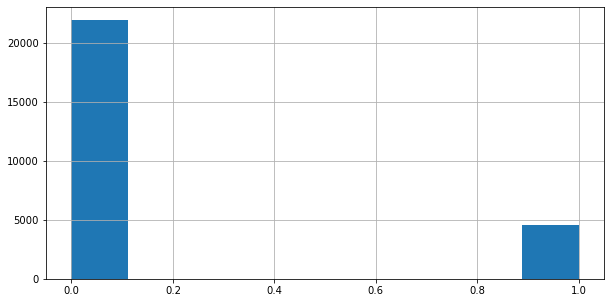

In [40]:
abnb.host_is_superhost.hist(figsize=(10,5), bins=9);

In [41]:
# In this cases all hosts features are missing data too so I'll remove them
abnb.dropna(subset=['host_is_superhost'], inplace=True)
abnb.shape

(26520, 71)

#### host_listings_count

mean:  9.0
median:  1
quantile 0.97:  56
quantile 0.98:  63
quantile 0.99:  122
quantile 0.99:  122


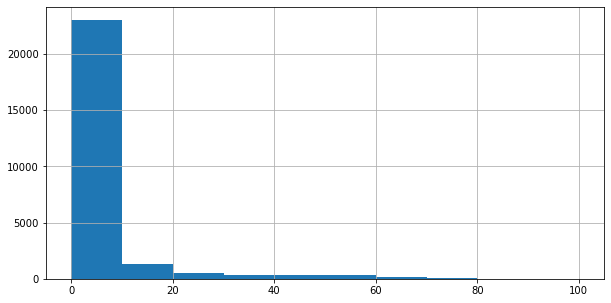

In [42]:
#abnb['host_listings_count'].value_counts(dropna=False) # freq
abnb.host_listings_count.hist(figsize=(10,5), bins=10, range=(0,100));
#sns.displot(abnb, x="host_listings_count")
#print(round(abnb['host_listings_count'].describe()))

#quantiles
print("mean: ", round(abnb['host_listings_count'].mean(),0))
print("median: ",round(abnb.host_listings_count.quantile(q=0.5)))
print("quantile 0.97: ",round(abnb.host_listings_count.quantile(q=0.97)))
print("quantile 0.98: ",round(abnb.host_listings_count.quantile(q=0.98)))
print("quantile 0.99: ",round(abnb.host_listings_count.quantile(q=0.99)))
print("quantile 0.99: ",round(abnb.host_listings_count.quantile(q=0.99)))

#### host_identity_verified

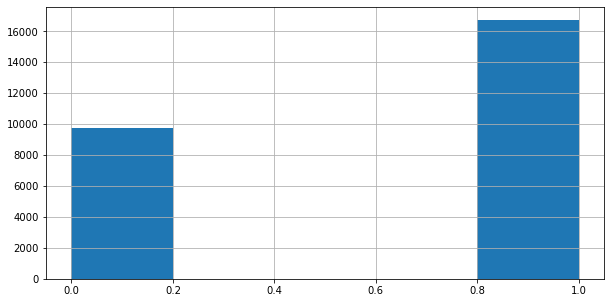

In [43]:
abnb.host_identity_verified.hist(figsize=(10,5), bins=5);

#### neighbourhood_cleansed

In [44]:
abnb['neighbourhood_cleansed'].value_counts(dropna=False)

Copacabana                  7692
Barra da Tijuca             2719
Ipanema                     2558
Jacarepaguá                 1329
Botafogo                    1216
Recreio dos Bandeirantes    1176
Leblon                      1164
Santa Teresa                 878
Centro                       770
Flamengo                     612
Leme                         505
Tijuca                       469
Laranjeiras                  422
Lagoa                        260
Camorim                      252
Catete                       236
São Conrado                  224
Glória                       210
Jardim Botânico              200
Gávea                        194
Vila Isabel                  188
Humaitá                      168
Maracanã                     165
Freguesia (Jacarepaguá)      141
Itanhangá                    136
Vidigal                      133
Vargem Pequena               117
Taquara                      117
Urca                         111
Vargem Grande                 94
Rio Compri

#### property_type

In [45]:
abnb['property_type'].value_counts(dropna=False)

Entire apartment                      15315
Private room in apartment              4124
Entire condominium                     1259
Private room in house                  1224
Entire house                           1138
Entire serviced apartment               597
Entire loft                             545
Private room in condominium             459
Shared room in apartment                268
Shared room in house                    191
Private room in bed and breakfast       150
Private room in guest suite             136
Room in hotel                            94
Room in aparthotel                       75
Entire villa                             71
Entire guesthouse                        64
Entire guest suite                       63
Private room in serviced apartment       59
Private room in guesthouse               50
Shared room in hostel                    46
Private room in villa                    43
Room in boutique hotel                   39
Private room in loft            

In [46]:
# categories that are types of houses or apartments
#abnb = abnb.drop('property_type_new', axis=1)
abnb.loc[abnb['property_type'].str.lower().str.contains('house|bungalow|lodge|cottage|villa|chalet|cabin|condominium|farm'), 'property_type_new'] = 'house'
abnb.loc[abnb['property_type'].str.lower().str.contains('apartment|loft'), 'property_type_new'] = 'apartment'
abnb.loc[:,'property_type_new'] = abnb.property_type_new.fillna('other')

abnb['property_type_new'].value_counts(dropna=False)


apartment    20984
house         4748
other          788
Name: property_type_new, dtype: int64

In [47]:
abnb.drop(['property_type'], axis=1, inplace=True)

#### room_type

Entire home/apt    19240
Private room        6580
Shared room          608
Hotel room            92
Name: room_type, dtype: int64


<AxesSubplot:xlabel='room_type', ylabel='Count'>

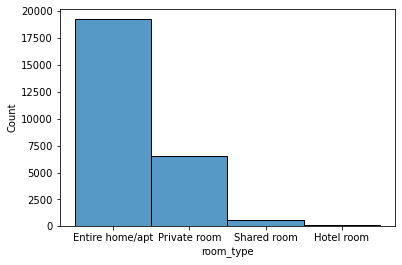

In [48]:
print(abnb['room_type'].value_counts(dropna=False))
sns.histplot(data=abnb, x="room_type")

#### accommodates

Missings:  0
count    26520.0
mean         4.0
std          2.0
min          1.0
25%          2.0
50%          4.0
75%          5.0
max         16.0
Name: accommodates, dtype: float64


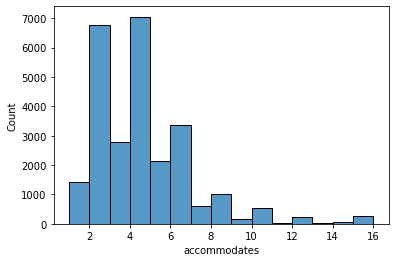

In [49]:
sns.histplot(data=abnb, x="accommodates",binwidth=1)
print("Missings: ", abnb['accommodates'].isnull().sum())
print(round(abnb['accommodates'].describe()))

#### bedrooms and beds

In [ ]:
#abnb[abnb['bedrooms'].isna()][:100]

Missings:  1735
count    24785.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          1.0
75%          2.0
max         30.0
Name: bedrooms, dtype: float64


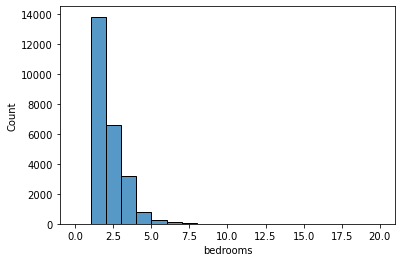

In [50]:
sns.histplot(data=abnb, x="bedrooms",binwidth=1, binrange=(0,20))
print("Missings: ", abnb['bedrooms'].isnull().sum())
print(round(abnb['bedrooms'].describe()))
#print(abnb['bedrooms'].value_counts(dropna=False)) # NaN=1735

In [51]:
abnb.groupby('accommodates').bedrooms.median()

accommodates
1     1.0
2     1.0
3     1.0
4     1.0
5     2.0
6     2.0
7     3.0
8     3.0
9     3.0
10    4.0
11    3.0
12    4.0
13    4.0
14    5.0
15    4.0
16    5.0
Name: bedrooms, dtype: float64

In [52]:
# Replacing missings by median of bedrooms grouped by accommodates 
abnb['bedrooms_new'] = abnb['bedrooms']
abnb.loc[abnb.bedrooms.isnull(), 'bedrooms_new'] = 1
abnb.loc[(abnb.bedrooms.isnull() & abnb.accommodates > 4), 'bedrooms_new'] = 2
abnb.loc[(abnb.bedrooms.isnull() & abnb.accommodates > 6), 'bedrooms_new'] = 3
abnb.loc[(abnb.bedrooms.isnull() & abnb.accommodates > 9), 'bedrooms_new'] = 4

Missings:  0
count    26520.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          1.0
75%          2.0
max         30.0
Name: bedrooms_new, dtype: float64


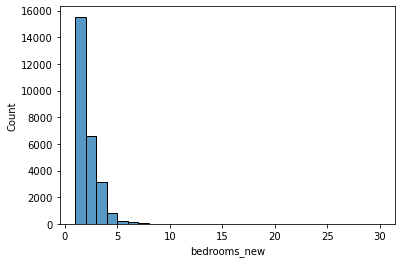

In [53]:
sns.histplot(data=abnb, x="bedrooms_new",binwidth=1)
print("Missings: ", abnb['bedrooms_new'].isnull().sum())
print(round(abnb['bedrooms_new'].describe()))

In [54]:
print("Missings: ", abnb['beds'].isnull().sum())
print(round(abnb['beds'].describe()))
#abnb['beds'].value_counts(dropna=False) # NaN=224

Missings:  224
count    26296.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         50.0
Name: beds, dtype: float64


In [55]:
abnb.groupby('accommodates').beds.median()

accommodates
1      1.0
2      1.0
3      2.0
4      2.0
5      3.0
6      3.0
7      4.0
8      5.0
9      6.0
10     5.0
11     6.0
12     7.0
13     9.0
14     7.5
15     8.0
16    10.0
Name: beds, dtype: float64

In [56]:
# Replacing missings by median of beds grouped by accommodates 
abnb['beds_new'] = abnb['beds']
abnb.loc[abnb.beds.isnull(), 'beds_new'] = 1
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 2), 'beds_new'] = 2
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 4), 'beds_new'] = 3
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 6), 'beds_new'] = 4
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 7), 'beds_new'] = 5
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 10), 'beds_new'] = 6
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 11), 'beds_new'] = 7
abnb.loc[(abnb.beds.isnull() & abnb.accommodates > 12), 'beds_new'] = 9

Missings:  0
count    26520.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         50.0
Name: beds_new, dtype: float64


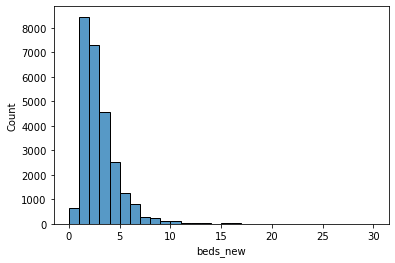

In [57]:
sns.histplot(data=abnb, x="beds_new",binwidth=1, binrange=(0,30))
print("Missings: ", abnb['beds_new'].isnull().sum())
print(round(abnb['beds_new'].describe()))

In [58]:
# Removing original columns
abnb.drop(['bedrooms', 'beds'], axis=1, inplace=True)

#### minimum and maximum nights columns 

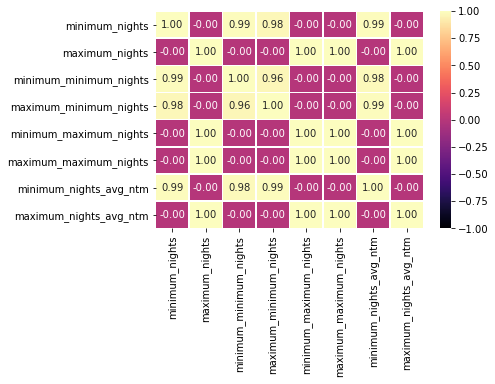

In [59]:
abnb2 = abnb.filter(like='nights')
# Heatmap
sns.heatmap(abnb2.corr(), vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="magma", cbar=True, linewidths=0.5)

#plt.savefig('heatmap.png')
plt.show()

Because of high correlation and easiest explanation of the features, just minimum_nights and maximum_nights will be retained.

In [60]:
abnb.drop(['minimum_minimum_nights',
           'maximum_minimum_nights', 
           'minimum_maximum_nights',
           'maximum_maximum_nights',
           'minimum_nights_avg_ntm',
           'maximum_nights_avg_ntm'], axis=1, inplace=True)

#### has_availability
Aproximatelly 97% of total cases in just one category. Removing this feature.

In [61]:
#abnb.hist(column= ['has_availability'], figsize=(8,5), bins=5);
print(abnb['has_availability'].value_counts(normalize=True, dropna=False))

1    0.97089
0    0.02911
Name: has_availability, dtype: float64


In [62]:
abnb.drop(['has_availability'], axis=1, inplace=True)

#### availability

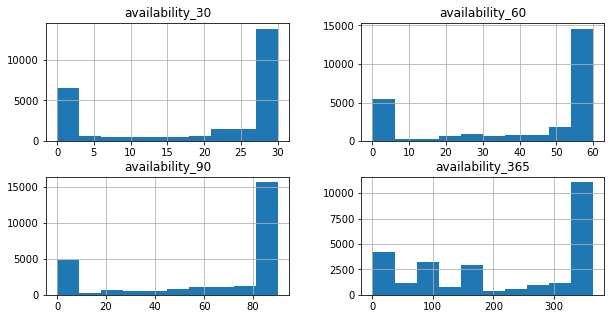

In [63]:
abnb.hist(column= ['availability_30', 
                   'availability_60', 
                   'availability_90', 
                   'availability_365'], figsize=(10,5), bins=10);

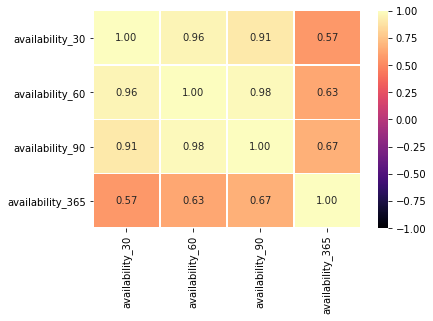

In [64]:
abnb2 = abnb.filter(like='availability_')
# Heatmap
sns.heatmap(abnb2.corr(), vmin=-1., vmax=1., annot=True, fmt='.2f', cmap='magma', cbar=True, linewidths=0.5)

#plt.savefig('heatmap.png')
plt.show()

Availability measures are high correlated. Only availability_365 will be retained.

In [65]:
abnb.drop(['availability_30', 
           'availability_60',
           'availability_90'], axis=1, inplace=True)

#### number_of_reviews

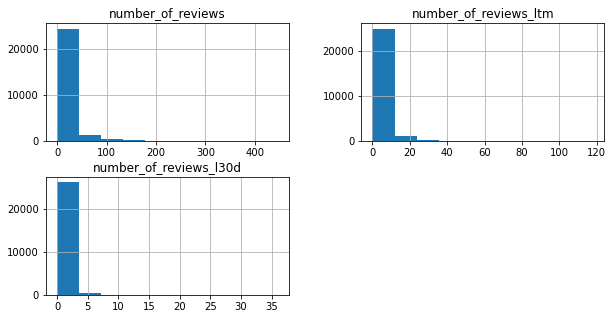

In [66]:
abnb.hist(column= ['number_of_reviews', 
                   'number_of_reviews_ltm',
                   'number_of_reviews_l30d'], figsize=(10,5), bins=10);

#### first_review

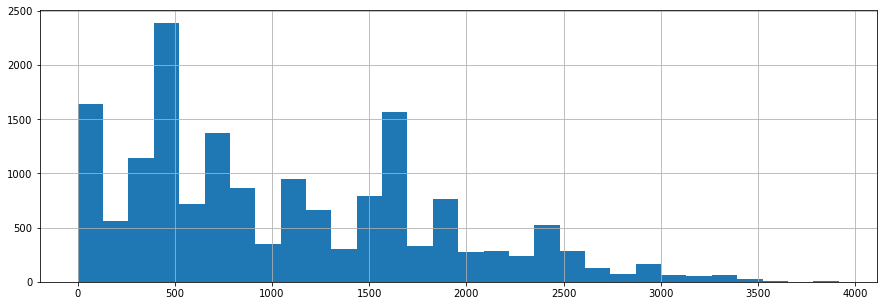

In [67]:
abnb.first_review = pd.to_datetime(abnb.first_review) 

abnb['days_first_review'] = (abnb.last_scraped - abnb.first_review).astype('timedelta64[D]')
abnb.days_first_review.hist(figsize=(15,5), bins=30);

In [68]:
abnb['days_first_review'] = pd.cut(abnb['days_first_review'], 
                                   bins=[0, 360, 720, 1440, max(abnb.days_first_review)], 
                                   include_lowest=True, 
                                   labels=['0-12 months',  
                                           '12-24 months', 
                                           '24-48 months', 
                                           '48+ months']).astype('str')

replace_values = {'nan': 'no reviews'}

abnb = abnb.replace({'days_first_review': replace_values})       
abnb.days_first_review.value_counts(normalize=True)

no reviews      0.373190
48+ months      0.213084
12-24 months    0.169495
24-48 months    0.151998
0-12 months     0.092232
Name: days_first_review, dtype: float64

#### last_review

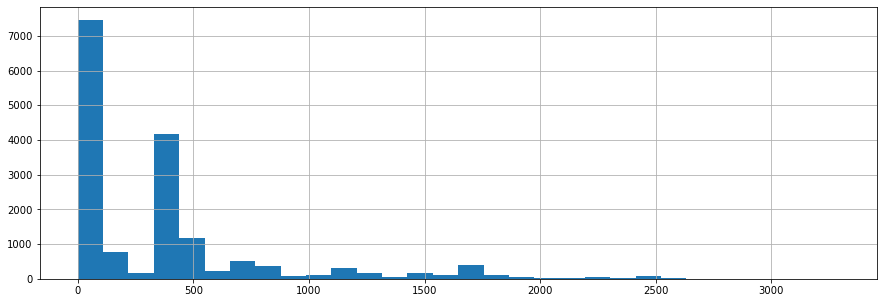

In [69]:
abnb.last_review = pd.to_datetime(abnb.last_review) 

abnb['days_last_review'] = (abnb.last_scraped - abnb.last_review).astype('timedelta64[D]')
abnb.days_last_review.hist(figsize=(15,5), bins=30);

In [70]:
abnb['days_last_review'] = pd.cut(abnb['days_last_review'], 
                                      bins=[0, 90, 360, 720, max(abnb.days_last_review)], 
                                      include_lowest=True, 
                                      labels=['0-3 months',
                                              '3-12 months',
                                              '12-24 months',
                                              '24+ months']).astype('str')

replace_values = {'nan': 'no reviews'}

abnb = abnb.replace({'days_last_review': replace_values})       
abnb.days_last_review.value_counts(normalize=True)

no reviews      0.373190
0-3 months      0.272549
12-24 months    0.186011
24+ months      0.090045
3-12 months     0.078205
Name: days_last_review, dtype: float64

#### reviews_per_month

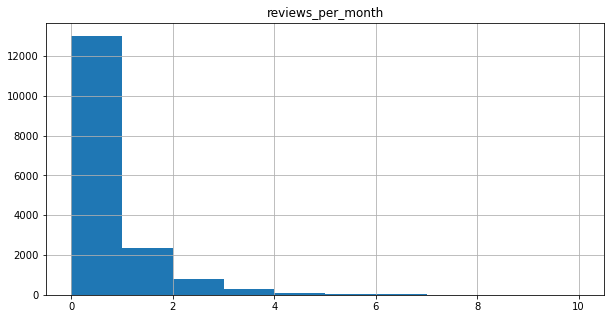

In [71]:
abnb.hist(column= ['reviews_per_month'], figsize=(10,5), bins=10, range=(0,10));

### review_scores

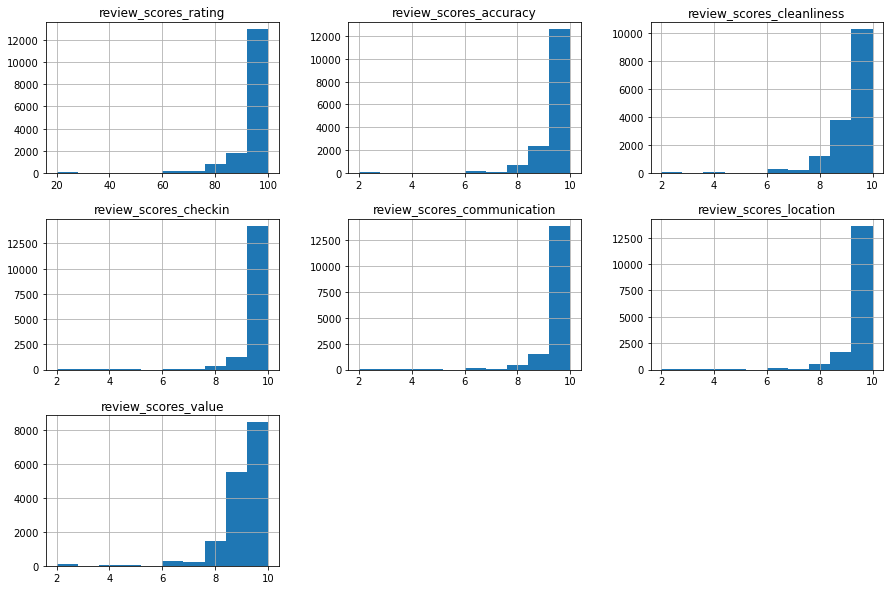

In [72]:
abnb.hist(column= ['review_scores_rating', 
                   'review_scores_accuracy',
                   'review_scores_cleanliness', 
                   'review_scores_checkin', 
                   'review_scores_communication', 
                   'review_scores_location', 
                   'review_scores_value'], figsize=(15,10), bins=10);

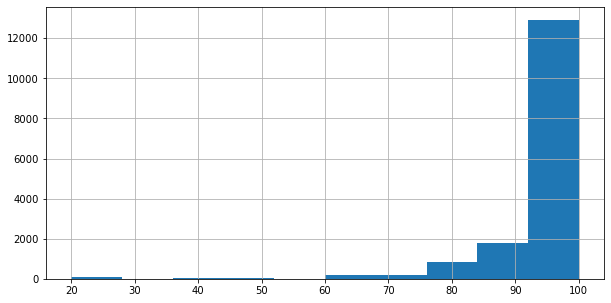

In [73]:
#review_scores = list(abnb.columns[abnb.columns.str.startswith('review_scores') == True])
#review_scores.pop(0)
#print(review_scores)

#abnb.review_scores_rating = abnb.review_scores_rating.astype('float64')
#print(abnb.review_scores_rating.value_counts(dropna=False, normalize=True))
abnb.review_scores_rating.hist(figsize=(10,5), bins=10);

In [74]:
review_scores = list(abnb.columns[abnb.columns.str.startswith('review_scores') == True])
review_scores.pop(0)

def bin_column(col, bins, labels, nan_label='missing'):
  # Takes in a column name, bin cut points and labels, replaces the original column with a binned version, 
  # and replaces NaN (with 'missing' if unspecified).
    abnb[col] = pd.cut(abnb[col], bins=bins, labels=labels, include_lowest=True)
    abnb[col] = abnb[col].astype('str')
    abnb[col].fillna(nan_label, inplace=True)
    
for col in review_scores:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8', '9', '10'],
               nan_label='no reviews')

    
bin_column('review_scores_rating', 
           bins=[0, 90, 95, 100],
           labels=['0-89', '90-94', '95-100'], 
           nan_label='no reviews')



#### instant_bookable

In [75]:
abnb.instant_bookable.value_counts(dropna=False, normalize=True)

0    0.655732
1    0.344268
Name: instant_bookable, dtype: float64

#### calculated host_listings_count

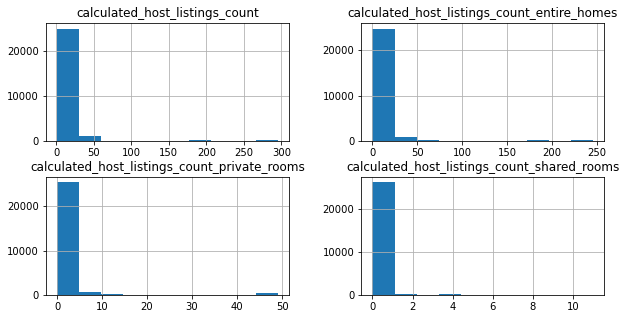

In [76]:
abnb.hist(column= ['calculated_host_listings_count', 
                   'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 
                   'calculated_host_listings_count_shared_rooms'], figsize=(10,5), bins=10);

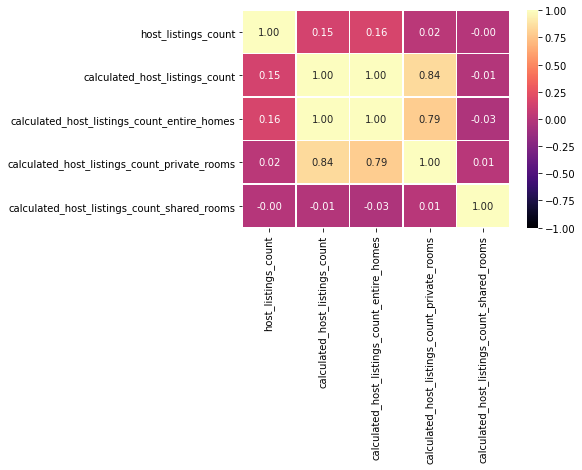

In [77]:
abnb2 = abnb.filter(like='host_listings_count')
# Heatmap
sns.heatmap(abnb2.corr(), vmin=-1., vmax=1., annot=True, fmt='.2f', cmap='magma', cbar=True, linewidths=0.5)

#plt.savefig('heatmap.png')
plt.show()

In [78]:
# Removing columns because of high correlation in host_listings columns
abnb.drop(['calculated_host_listings_count_entire_homes', 
           'calculated_host_listings_count_private_rooms'], axis=1, inplace=True)

## Exploratory Data Analysis


Price has a large range values (high variance (stdˆ2)), and many outliers as boxplot shows.

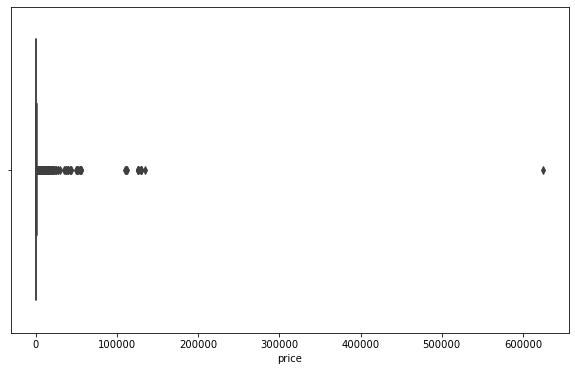

In [79]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=abnb["price"])

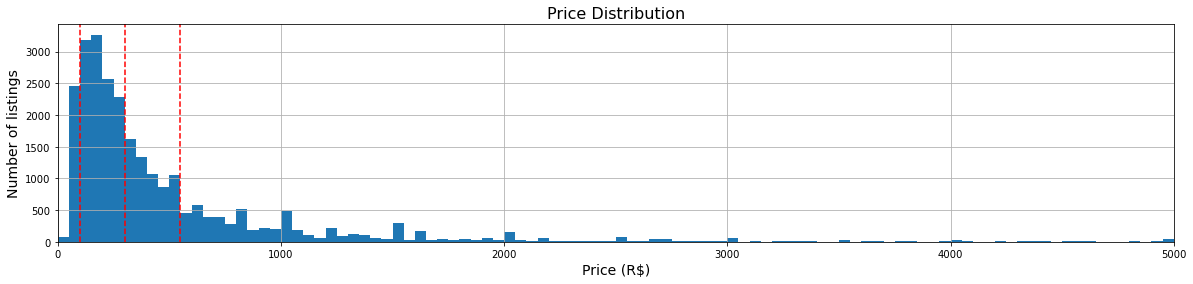

In [81]:
# Distribution plot
plt.figure(figsize=(20,4))
abnb.price.hist(bins=100, range=(0,5000))
plt.margins(x=0)
plt.axvline(100, color='red', linestyle='--')
plt.axvline(300, color='red', linestyle='--')
plt.axvline(550, color='red', linestyle='--')
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price (R$)", fontsize = 14)
plt.ylabel("Number of listings", fontsize = 14)
plt.show()

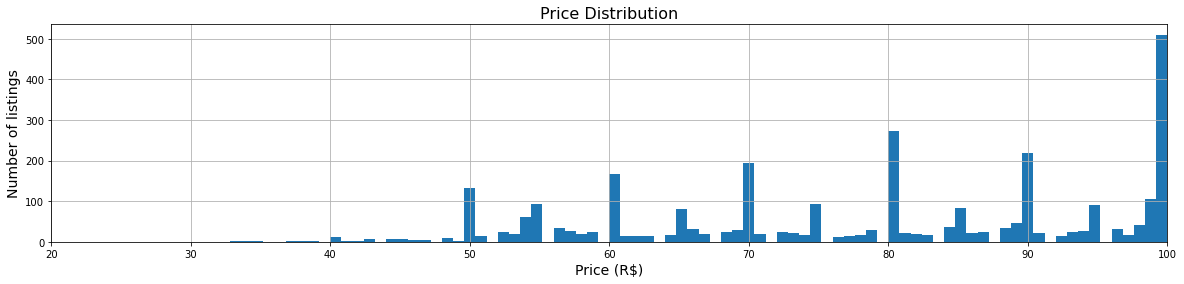

In [82]:
plt.figure(figsize=(20,4))
abnb.price.hist(bins=100, range=(20,100))
plt.margins(x=0)
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price (R$)", fontsize = 14)
plt.ylabel("Number of listings", fontsize = 14)
plt.show()

In [83]:
# Quantiles 
print("quantile 0.97: ",round(abnb.price.quantile(q=0.97)))
print("quantile 0.98: ",round(abnb.price.quantile(q=0.98)))
print("quantile 0.99: ",round(abnb.price.quantile(q=0.99)))

quantile 0.97:  2727
quantile 0.98:  3818
quantile 0.99:  5691


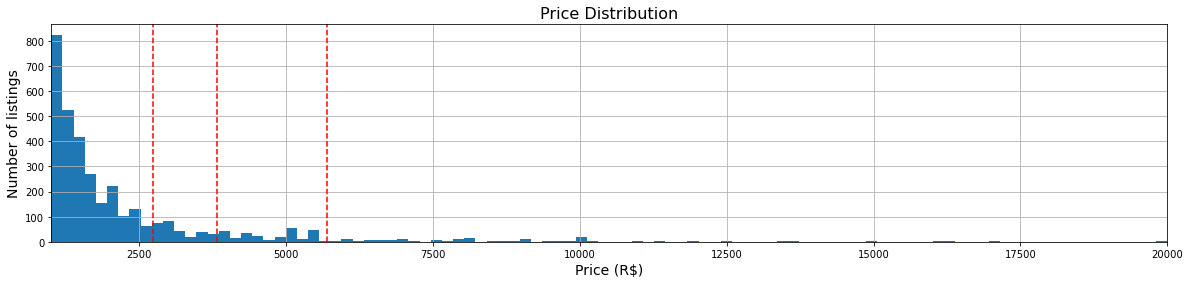

In [84]:
plt.figure(figsize=(20,4))
abnb.price.hist(bins=100, range=(1000,20000))
plt.margins(x=0)
plt.axvline(round(abnb.price.quantile(q=0.97)), color='red', linestyle='--')
plt.axvline(round(abnb.price.quantile(q=0.98)), color='red', linestyle='--')
plt.axvline(round(abnb.price.quantile(q=0.99)), color='red', linestyle='--')
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price (R$)", fontsize = 14)
plt.ylabel("Number of listings", fontsize = 14)
plt.show()

In [85]:
# Replacing values over quantile 0.99 to quantile 0.99
abnb.loc[abnb.price >= 5680, 'price'] = 5680

#### number_of_reviews x price

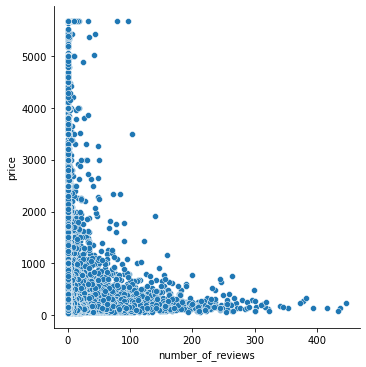

In [86]:
sns.relplot(x="number_of_reviews", y="price", data=abnb);

#### Latitude and Longitude

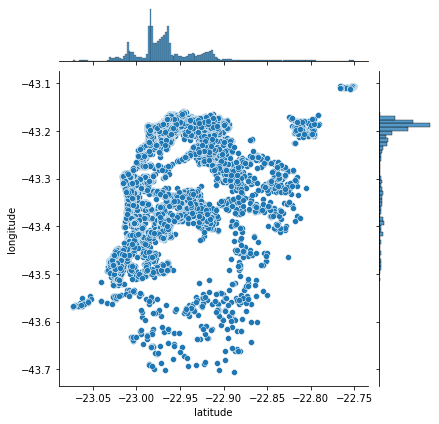

In [87]:
sns.jointplot(data=abnb, x="latitude", y="longitude")

## Amenities

Amenities that adds value to properties:
- Air conditioning
- TV
- Coffee machines
- Fire equipment
- Gym
- Pool

Amenities that devaluate properties:
- Stove and microwave oven
- Coffee machine
- Refrigerator
- Bed comforts

In [131]:
abnb.iloc[:5,36:54]

,tv,cable_tv,stove_oven,refrigerator,beachfront,coffee,workspace,bath_essentials,kitchen,laundry,elevator,bed_comforts,fire_equip,parking,garden,gym,wifi,pool
id,,,,,,,,,,,,,,,,,,
17878,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
24480,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25026,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
35636,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
35764,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


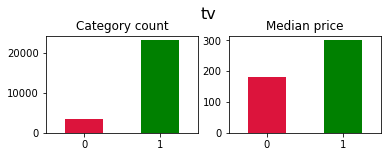

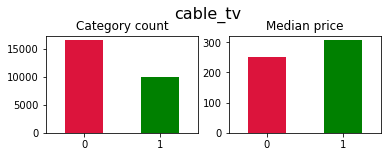

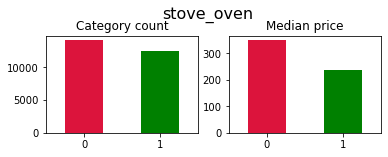

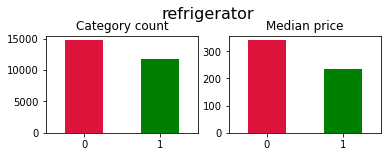

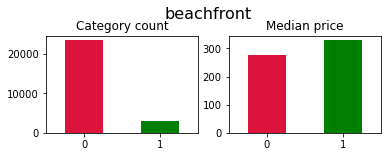

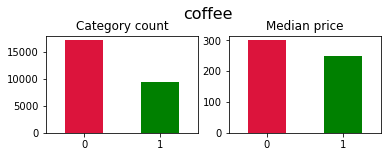

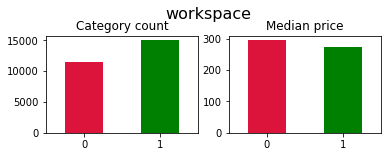

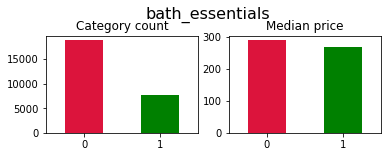

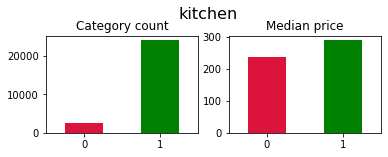

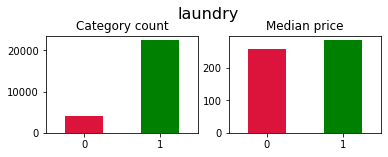

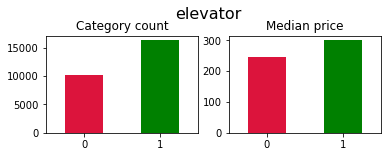

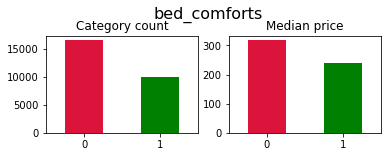

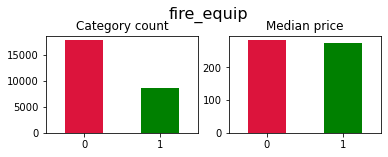

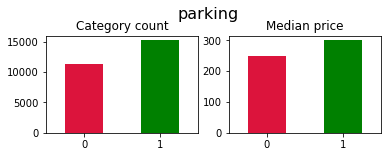

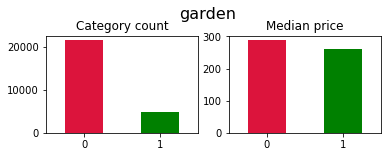

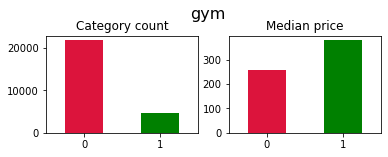

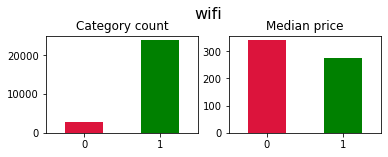

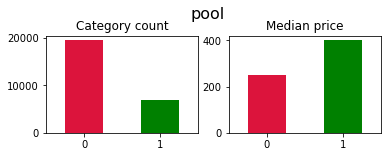

In [132]:
# Plots a simple bar chart of the counts of true and false categories in the column specified, next to a 
# bar chart of the median price for each category. A figure size can optionally be specified.

def binary_count_and_price_plot(col, figsize=(8,3)):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    abnb.groupby(col).size().plot(kind='bar', ax=ax1, color=['crimson', 'g'])
    ax1.set_xticklabels(labels=['0', '1'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    abnb.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['crimson', 'g'])
    ax2.set_xticklabels(labels=['0', '1'], rotation=0)
    ax2.set_title('Median price')
    ax2.set_xlabel('')
    
    plt.show()
    
for col in abnb.iloc[:,36:54].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

Amenities that have higher median price:
 - pool
 - gym
 - cable_tv
 - tv
 - air_conditioning
 
Amenities that have lower median price:
 - refrigerator
 - stove_oven
 - bed_comforts
 - wifi

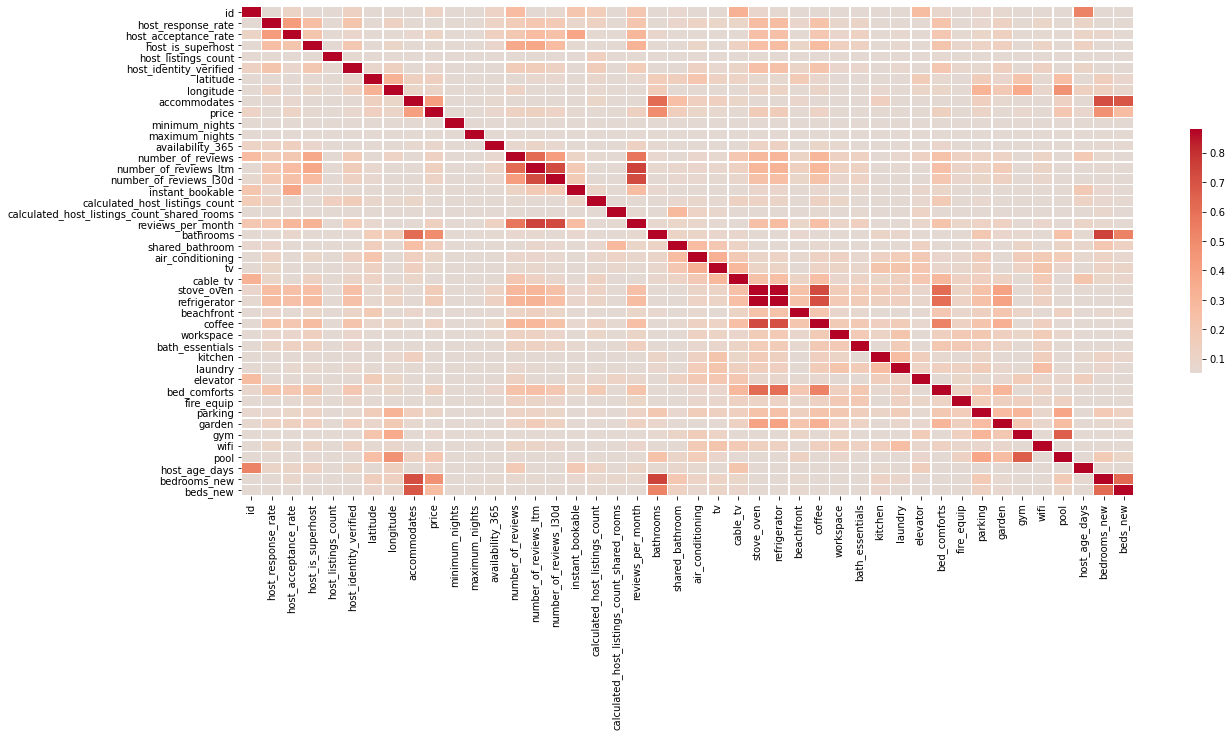

In [100]:
corr_matrix = abnb.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, center=0, linewidths=.5, vmin=0.05, 
            vmax=corr_matrix[corr_matrix != 1.0].max().max(), cbar_kws={"shrink": .5});

In [101]:
corr_matrix['price'].sort_values(ascending=False)

price                                          1.000000
bathrooms                                      0.493746
bedrooms_new                                   0.470568
accommodates                                   0.415902
beds_new                                       0.267857
pool                                           0.199461
stove_oven                                     0.167172
refrigerator                                   0.154387
shared_bathroom                                0.151660
latitude                                       0.140637
number_of_reviews_ltm                          0.136517
bed_comforts                                   0.133063
reviews_per_month                              0.131231
number_of_reviews                              0.130469
coffee                                         0.117897
id                                             0.115640
number_of_reviews_l30d                         0.115315
host_acceptance_rate                           0

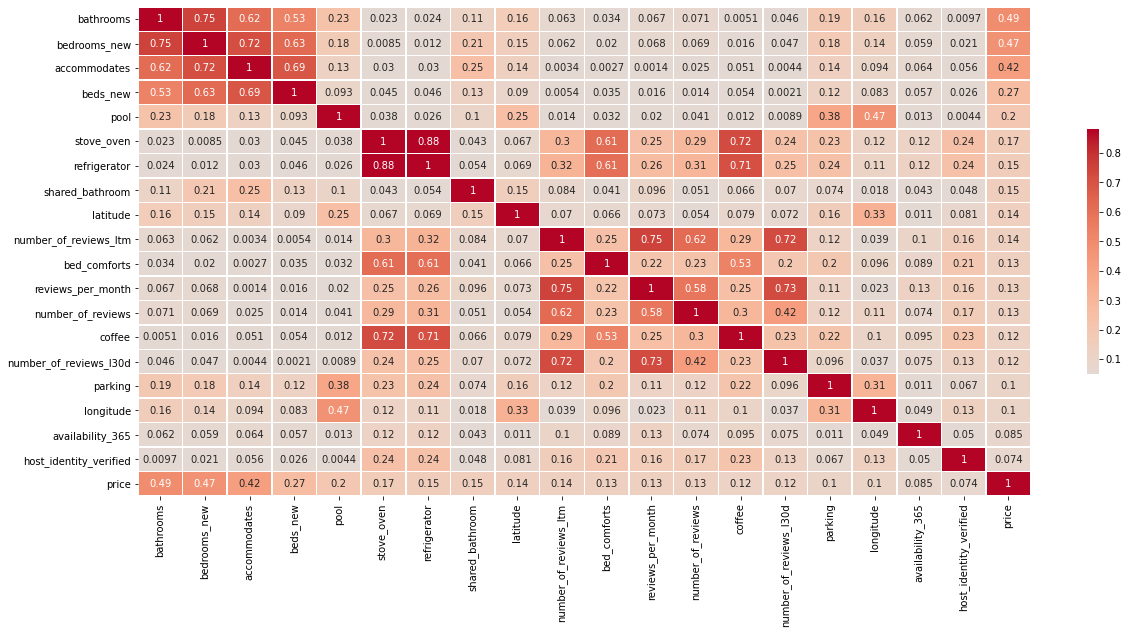

In [103]:
# Most correlated with price features, just the first amenities features selected 
# because of high correlation between then
abnb2 = abnb[['bathrooms',
              'bedrooms_new',
              'accommodates',
              'beds_new',
              'pool',
              'stove_oven',
              'refrigerator',
              'shared_bathroom',
              'latitude',
              'number_of_reviews_ltm',
              'bed_comforts',
              'reviews_per_month',
              'number_of_reviews',
              'coffee',
              'number_of_reviews_l30d',
              'parking',
              'longitude',
              'availability_365',
              'host_identity_verified',
              'price']]

corr_matrix = abnb2.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, center=0, linewidths=.5, vmin=0.05, 
            vmax=corr_matrix[corr_matrix != 1.0].max().max(), cbar_kws={"shrink": .5}, annot=True);

High correlation between bathrooms, bedrooms, accommodates, beds. Removing:
- bedrooms: has more high correlations with other features.
- beds: has less correlation with Price than this other features.
- bathrooms: has higher correlations with other features than accomodates.

High correlation between amenities features stoven_oven, refrigerator, coffee, bed_comforts. Removing:
- stoven_oven: slightly more correlated with other features.
- refrigerator: slightly more correlated with other features.
- coffee: slightly more correlated with other features.

High correlation between features number_of_reviews_ltm, reviews_per_month, number_of_reviews, number_of_reviews_l30d. Removing:
- number_of_reviews_ltm: slightly more correlated with other features. 
- number_of_reviews_l30d: slightly more correlated with other features.
- number_of_reviews: slightly more correlated with other features.
Medium correlation between amenities features pool, parking. 

### Normalizing and Standardizing data


In [108]:
#abnb.set_index('id', inplace=True) 
abnb.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,shared_bathroom,air_conditioning,tv,cable_tv,stove_oven,refrigerator,beachfront,coffee,workspace,bath_essentials,kitchen,laundry,elevator,bed_comforts,fire_equip,parking,garden,gym,wifi,pool,host_age_days,property_type_new,bedrooms_new,beds_new,days_first_review,days_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17878,2021-02-23,2010-01-08,within an hour,100.0,100.0,1.0,2.0,1.0,Copacabana,-22.96592,-43.17896,Entire home/apt,5,221,5,180,304,260,12,2,2010-07-15,2021-02-08,90-94,9,9,10,10,10,9,1,1,0,2.01,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4064.0,house,2.0,2.0,48+ months,0-3 months
24480,2021-02-23,2010-03-26,within a few hours,100.0,NaN,0.0,0.0,1.0,Ipanema,-22.98570,-43.20193,Entire home/apt,2,307,3,90,10,85,0,0,2010-09-26,2018-02-14,90-94,10,10,10,10,10,9,0,1,0,0.67,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3987.0,apartment,1.0,1.0,48+ months,24+ months
25026,2021-02-23,2012-10-03,within a few hours,97.0,78.0,0.0,11.0,0.0,Copacabana,-22.97712,-43.19045,Entire home/apt,2,160,7,60,328,238,0,0,2010-06-07,2020-02-15,90-94,9,9,9,10,10,9,0,11,0,1.82,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3065.0,apartment,1.0,2.0,48+ months,12-24 months
35636,2021-02-24,2010-06-27,missing,NaN,100.0,1.0,1.0,1.0,Ipanema,-22.98816,-43.19359,Entire home/apt,2,273,2,89,207,181,2,0,2013-10-22,2020-03-15,90-94,10,9,10,10,10,9,0,1,0,2.02,1.5,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3895.0,apartment,1.0,1.0,48+ months,3-12 months
35764,2021-02-23,2010-06-27,within an hour,100.0,94.0,1.0,1.0,1.0,Copacabana,-22.98127,-43.19046,Entire home/apt,2,135,3,15,101,353,25,4,2010-10-03,2021-02-10,95-100,10,10,10,10,10,10,0,1,0,2.79,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3894.0,apartment,1.0,1.0,48+ months,0-3 months


In [109]:
#Removing unselected features
model_df = abnb.drop(['bedrooms_new', 
                      'beds_new',
                      'bathrooms', 
                      'stove_oven',
                      'refrigerator',
                      'coffee',
                      'number_of_reviews_ltm',
                      'number_of_reviews_l30d',
                      'number_of_reviews',
                      'air_conditioning',
                      'gym',
                      'tv',
                      'cable_tv',
                      'wifi',
                      'garden',
                      'beachfront',
                      'workspace',
                      'elevator',
                      'kitchen',
                      'fire_equip',
                      'laundry',
                      'bath_essentials',
                      'neighbourhood_cleansed', 
                      'last_scraped', 'host_since', 'first_review', 'last_review', 
                      'calculated_host_listings_count',
                      'calculated_host_listings_count_shared_rooms'], axis=1)


Applying One-Hot-Encoding method, transforming 1 categorical column with n unique values into n-1 dummies

In [110]:
model_df = pd.get_dummies(model_df)

In [112]:
num_cols = ['accommodates',
            'availability_365',  
            'host_age_days', 
            'host_listings_count', 
            'maximum_nights', 
            'minimum_nights', 
            'reviews_per_month', 
            'price']

# Log transforming columns
num_cols = [i for i in num_cols if i not in ['availability_365', 'host_age_days']] # Removing items not to be transformed

for col in num_cols:
    model_df[col] = model_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    model_df[col] = np.log(model_df[col])
    
    model_df[col] = model_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    model_df[col] = np.log(model_df[col])
    

/Users/marina/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


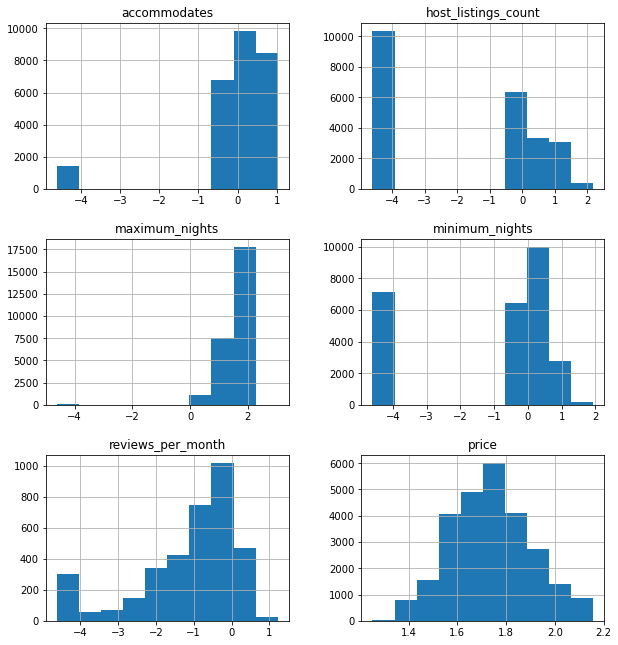

In [113]:
model_df[num_cols].hist(figsize=(10,11));

In [115]:
X = model_df.drop('price', axis=1)
y = model_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

## Modelling

I wish I had more time to test more models, but as it was very close to the deadline, I was able to test only one model:

- Gradient Boosting method, with the XGBRegressor from the XGBoost library

Gradient-boosted decision trees are a machine learning technique for optimizing the predictive value of a model through successive steps in the learning process. Each iteration of the decision tree involves adjusting the values of the coefficients, weights, or biases applied to each of the input variables being used to predict the target value, with the goal of minimizing the loss function (the measure of difference between the predicted and actual target values). The gradient is the incremental adjustment made in each step of the process; boosting is a method of accelerating the improvement in predictive accuracy to a sufficiently optimum value.

The evaluation metrics used for loss will be mean squared error and for accuracy will be R-squared .  Grid search and cross-validation will be used for validation.

In [116]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [124]:
def grid_search_model (x, y, clf, parameters, scorer, cv, verbose):
    grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv =  cv, verbose= verbose)
    start = time.time()
    grid_fit = grid_obj.fit(x, y)
    end = time.time()
    print ("Best score:" , grid_fit.best_score_)
    print ("Best parameters:" , grid_fit.best_params_)
    print ("Find best parameterers in {:.4f} seconds.".format(end - start)) 
    return grid_fit, grid_fit.best_estimator_

In [125]:
clf = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.02,
                max_depth = 5, n_estimators=500)
# A parameter grid for XGBoost
parameters = {
            'min_child_weight': [0, 1, 10],
            'gamma': [1, 5, 10],
            'alpha': [0, 10, 50]
            }
cv_kfold = KFold(6, random_state=12)
grid, model = grid_search_model(X_train, y_train, clf, parameters, 'neg_mean_squared_error', cv_kfold, 0 )
model

Best score: -0.011910183605559054
Best parameters: {'alpha': 0, 'gamma': 1, 'min_child_weight': 0}
Find best parameterers in 1115.5886 seconds.


XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
model.fit(X_train, y_train)
preds_xgb_train = model.predict(X_train)
preds_xgb_test = model.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, preds_xgb_train),4))
print("Validation MSE:", round(mean_squared_error(y_test, preds_xgb_test),4))
print("\nTraining r2:", round(r2_score(y_train, preds_xgb_train),4))
print("Validation r2:", round(r2_score(y_test, preds_xgb_test),4))


Training MSE: 0.0115
Validation MSE: 0.0118

Training r2: 0.5816
Validation r2: 0.5731


It means that explain aprox 58% of the variability of data in the independent variables, and with a MSE aprox 0.01, indicanting how well it explain the observation.

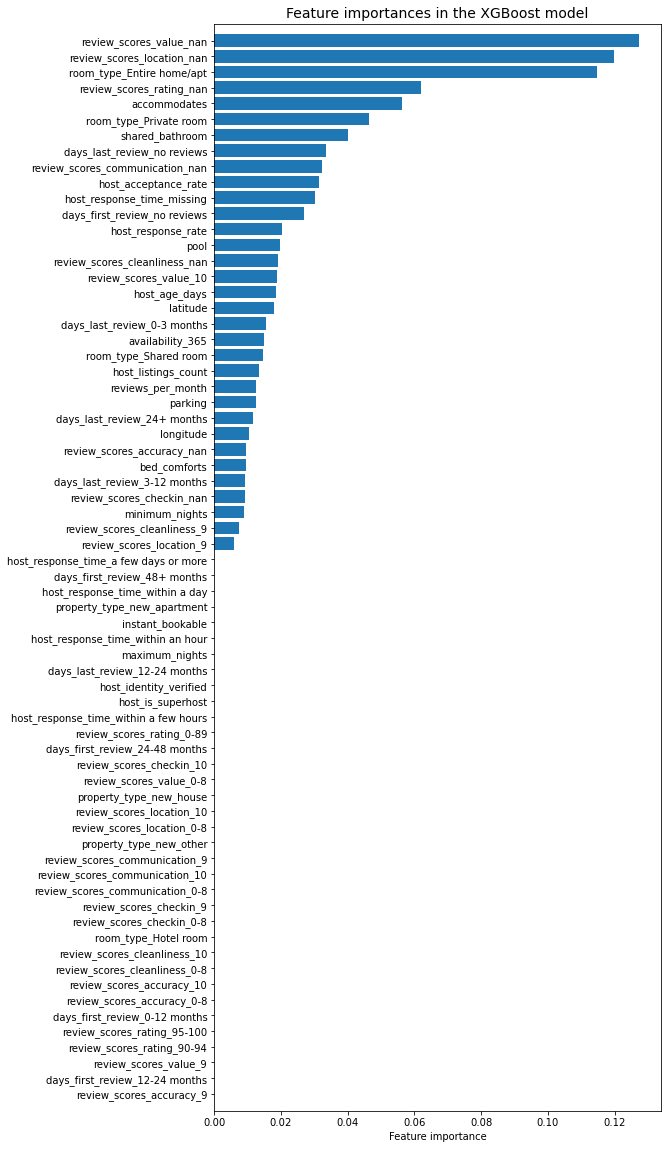

In [128]:
ft_weights_xgb_reg = pd.DataFrame(model.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()